In [103]:
%matplotlib inline

# ALE meta-analysis

In [104]:
import os
from os import listdir
from os.path import isfile, join
import nibabel as nib
from pathlib import Path

import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map
from nimare.io import convert_sleuth_to_dataset
from nimare.utils import get_resource_path

from nimare.correct import FWECorrector
from nimare.meta.cbma import ALE
import pickle
import csv

In [105]:
_dset_folder = r'../data_db/dataset_ale/v2/'
_nii_folder = r'../data_db/nifti-ale/v2/'
_res_folder = r'../data_db/res/v2/'

## ALE Working Memory: visual task stimulus and task modality n-task

In [106]:
dsetfiles = {Path(f).stem: f for f in listdir(_dset_folder) if isfile(join(_dset_folder, f))}

In [107]:
files = {k: os.path.join(os.path.abspath(_dset_folder), file_name) for k, file_name in dsetfiles.items()}
dsets = {k: convert_sleuth_to_dataset(f) for k, f in files.items()}

In [108]:
corrected_results = {}
# ale = ALE(null_method="montecarlo",n_iters=100,n_cores=8)
ale = ALE(null_method="approximate")
corr = FWECorrector(method="montecarlo", voxel_thresh=0.001, n_iters=100, n_cores=8)
for index, (k, dset) in enumerate(dsets.items()):
    result = ale.fit(dset)
    corrected_results[k] = corr.transform(result)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:06<00:00, 15.23it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:05<00:00, 16.86it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:03<00:00, 25.40it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:04<00:00, 21.70it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE corr

C:\ProgramData\Anaconda3\envs\tfg-env\lib\site-packages\nilearn\plotting\displays\_slicers.py:383: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


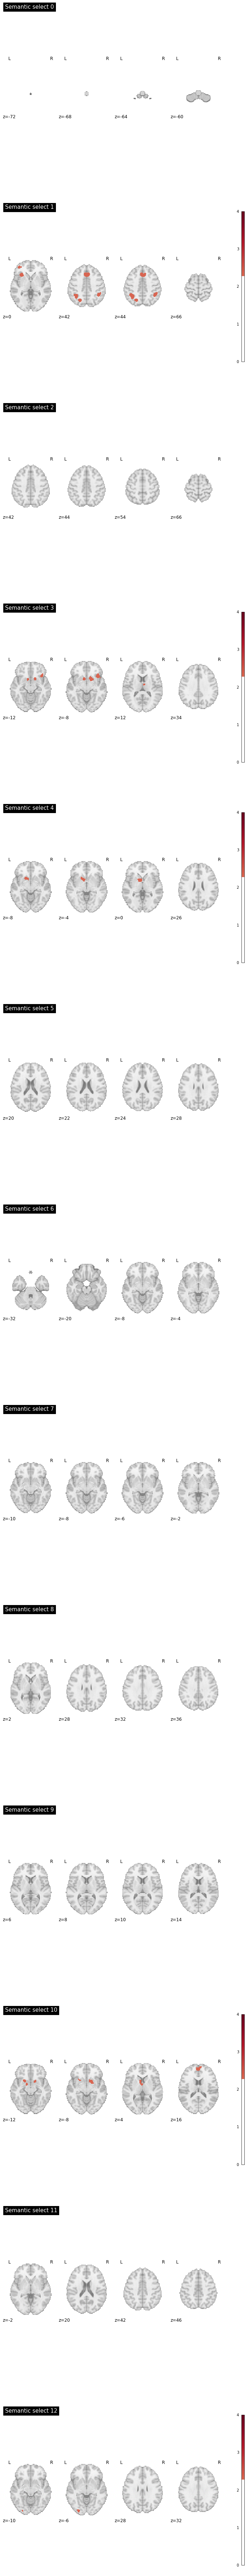

In [109]:
## Check
map_name = "z_desc-size_level-cluster_corr-FWE_method-montecarlo"
imgs = {}
res_len = len(corrected_results)
fig, axes = plt.subplots(figsize=(12, res_len * 10), nrows=res_len)
for index, (k, corr_result) in enumerate(corrected_results.items()):
    imgs[k] = corr_result.get_map(
        map_name
    )

    plot_stat_map(
        imgs[k],
        cut_coords=4,
        display_mode="z",
        title="Semantic select " + str(index),
        threshold=2.326,  #'auto' # cluster-level p < .01, one-tailed
        cmap="RdBu_r",
        vmax=4,
        axes=axes[index],
        figure=fig,
    )


## Save images to nifti

In [110]:
for index, (file_name, img) in enumerate(imgs.items()):
    nib.save(img, os.path.join(os.path.abspath(_nii_folder), file_name + '.nii'))
    nib.save(corrected_results[file_name].get_map('z'),
             os.path.join(os.path.abspath(_nii_folder), file_name + '-z.nii'))

## Statistics

In [111]:
from IPython.display import display
from nimare.diagnostics import FocusCounter

counter = FocusCounter(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
for index, (file_name, corr_res) in enumerate(corrected_results.items()):
    print(file_name)
    count_table, _ = counter.transform(corr_res)
    print(count_table.shape)
    display(count_table)

select00_test


(2, 0)


""
Center of Mass
Test test test-


select01_wm


100%|██████████| 20/20 [00:00<00:00, 37.07it/s]

(21, 11)


,1,2,3,4,5,6,7,8,9,10,11
Cluster ID,,,,,,,,,,,
Center of Mass,"(44, -46, 43)","(39, 42, 23)","(31, 4, 55)","(20, -67, 53)","(1, 20, 45)","(-22, -66, 43)","(-26, 2, 54)","(-31, 22, 0)","(-37, -52, 46)","(-37, 51, 5)","(-46, 6, 27)"
Beneventi et al-An fMRI study of working memor.. Table 1 - Stereotactic locations of areas of significantly greater activation for the n-back main effect (p = 0.05 corrected) and the facial expressions - scrambled drawings interaction effect (p < 0.001 uncorrected; 5 voxel extent threshold),0,1,1,0,1,0,0,1,1,0,1
Carrion et al-Frontal Hypoactivation on Func.. TABLE 3 - LOCAL MAXIMA OF DIFFERENCES BETWEEN 2-BACK AND 0-BACK BY SUBTRACTION ANALYSES FOR THE TBI AND CONTROL GROUP,1,0,1,1,0,1,0,1,2,1,1
Carrion et al-Frontal Hypoactivation on Func.. TABLE 4 - LOCAL MAXIMA OF DIFFERENCES BETWEEN 3-BACK AND 0-BACK BY SUBTRACTION ANALYSES FOR THE TBI AND CONTROL GROUP,1,1,1,0,1,1,2,1,1,1,1
Di et al-Anterior cingulate cortex diff.. Table 1-1 Clusters that showed increased or decreased activations in the 2-back condition compared with the 1-back condition in the block designed runs 2-back> 1-back,0,0,0,1,0,1,1,1,0,2,1
Di et al-Anterior cingulate cortex diff.. Table 1-2 Clusters that showed increased or decreased activations in the 2-back condition compared with the 1-back condition in the block designed runs 1-back > 2-back,0,0,0,0,0,0,0,0,0,0,0
Drobyshevsky et al-A Rapid fMRI Task Battery for .. Table 2 - Sensitivity of tasks and Talairach coordinates of activated regions,1,0,1,1,1,1,1,0,1,1,0
Duggirala et al-Stimulus-dependent modulation .. Table 2-1 - Brain activations during two-back WM with words; objects and faces as stimuli; contrasted with their respective zero-back baseline task.,0,0,0,0,0,0,0,0,0,0,0
Duggirala et al-Stimulus-dependent modulation .. Table 2-2 - Brain activations during two-back WM with words; objects and faces as stimuli; contrasted with their respective zero-back baseline task.,0,0,0,0,0,0,0,1,2,0,1


select02_wm_decision-making


100%|██████████| 7/7 [00:00<00:00, 80.52it/s]

(8, 3)


,1,2,3
Cluster ID,,,
Center of Mass,"(29, -66, 44)","(-10, -69, 52)","(-19, -61, 60)"
Cruz et al-Alterations in the functional .. Table 3 - Summary of regions in the four-choice reversal learning task showing significant activation at reversal compared to expected positive reinforcement for ASD and controls,1,1,0
Nobre et al-Orienting Attention to Locatio.. Table 1 - Common Brain Activations to Precues and Retrocues,2,1,2
Nobre et al-Orienting Attention to Locatio.. Table 2-1 Differential Brain Activations to Precues and Retrocues,0,0,0
Nobre et al-Orienting Attention to Locatio.. Table 2-2 Differential Brain Activations to Precues and Retrocues,0,0,0
Reilhac et al-Role of the superior parietal .. Table 2-1 Cerebral regions activated during the letter string comparis on task for the substitution condition relative to baseline - Frame Dif - frames with strings from different families,0,0,0
Reilhac et al-Role of the superior parietal .. Table 2-1 Cerebral regions activated during the letter string comparis on task for the substitution condition relative to baseline - Sub Dif - string difference,0,0,1
Reilhac et al-Role of the superior parietal .. Table 2-1 Cerebral regions activated during the letter string comparis on task for the substitution condition relative to baseline - Sub Id - identical strings,0,0,0


select03_reward_anticipation_rw-norw


100%|██████████| 10/10 [00:00<00:00, 47.13it/s]

(11, 8)


,1,2,3,4,5,6,7,8
Cluster ID,,,,,,,,
Center of Mass,"(40, 20, -7)","(16, 9, -5)","(5, -5, 4)","(6, 22, 35)","(3, 2, 48)","(-7, 7, -4)","(-10, -11, -7)","(-21, 4, -9)"
Cohen et al-Individual differences in extr.. Table 1 Study 2 anticipation,1,0,1,0,0,0,0,0
John O Doherty et al-Neural Responses during Antici.. Table 1-1 Regions Responding during Anticipation of Glucose and Salt Tastes,0,0,0,0,0,0,0,0
Kirscg et al-Anticipation of reward in a no.. Table 1 - Locations and T values for the significant activations for the contrast monetary reward > visual cue,1,2,0,1,0,1,2,1
Kirscg et al-Anticipation of reward in a no.. Table 3 - Locations and T values for the significant activations for the contrast verbal reward > visual cue,1,2,1,0,0,0,1,1
Knutson et al-A region of mesial prefrontal .. Table 1-1 - reward versus nonreward outcomes on MPFC - Anticipation: Potential gain vs no outcome,1,2,1,1,1,2,0,0
Knutson et al-Anticipation of Increasing Mon.. Table 1-2 Regressor of interest Z scores and Talairach coordinates of peak activation foci right/anterior/superior (RAS),0,1,1,2,1,1,0,0
Knutson et al-Dissociation of reward anticip.. Table 1 - Group maximum Z-scores and Talairach Coordinates of activation foci,1,2,1,1,1,2,0,1
Koeneke et al-Individual preferences modulat.. Table 2 - Clusters showing preference-dependent activation during the anticipation phase.,1,0,0,0,0,0,0,0


select04_reward_anticipation_high_low_rew


100%|██████████| 13/13 [00:00<00:00, 50.93it/s]

(14, 7)


,1,2,3,4,5,6,7
Cluster ID,,,,,,,
Center of Mass,"(38, 27, -15)","(29, 24, -5)","(21, -1, 4)","(10, 3, 1)","(11, 16, -9)","(3, 23, 27)","(-12, 9, -1)"
Abler et al-From uncertainty to reward - B.. Table 1-1: fMRI Results: ANOVA 1 - modeling effects over the whole trial - increasing reward magnitude,0,1,0,1,0,0,1
Abler et al-From uncertainty to reward - B.. Table 1-2: fMRI Results: ANOVA 1 - modeling effects over the whole trial - high > low reward value level,1,0,0,0,0,0,1
Abler et al-From uncertainty to reward - B.. Table 2-1: fMRI results: ANOVA 2 - modeling effects over expectation phase - increasing reward magnitude,0,0,0,0,0,0,1
Croxson et al-Effort-Based Cost Benefit Valu.. Table 3 - Regions activated by the reward contrast (increased signal to anticipation of higher reward),0,1,0,0,1,0,1
Jarcho et al-Developmental effects of decis.. Table 2-2 Anticipation for Adolescents during Choice trials compared with Baseline,0,0,0,0,0,0,1
Jarcho et al-Developmental effects of decis.. Table 4-2 Anticipation for Adults during Choice trials compared with Baseline,0,0,0,0,0,0,0
Knutson et al-Anticipation of Increasing Mon.. Table 1-3 Regressor of interest Z scores and Talairach coordinates of peak activation foci right/anterior/superior (RAS),0,0,1,1,1,2,2
Knutson et al-Distributed Neural Representat.. Table 1-2 Regressor of interest Z scores and Talairach coordinates for peak activation foci,0,0,0,0,0,0,0


select05_reward_anticipation_exp_recv_rew


100%|██████████| 4/4 [00:00<00:00, 114.18it/s]

(5, 1)


,1
Cluster ID,
Center of Mass,"(31, -36, 21)"
John O Doherty et al-Neural Responses during Antici.. Table 1-2 Regions Responding during Anticipation of Glucose and Salt Tastes,0
"Rademacher et al-Dissociation of neural network.. Table 1-1 - Brain regions activated for anticipated reward in comparison to the ""no outcome"" condition inclusively masked with the (anticipation_(hit outcome) > consumption_(hit outcome)) contrast (uncorrected p = 0.001) - MID",1
"Rademacher et al-Dissociation of neural network.. Table 1-1 - Brain regions activated for anticipated reward in comparison to the ""no outcome"" condition inclusively masked with the (anticipation_(hit outcome) > consumption_(hit outcome)) contrast (uncorrected p = 0.001) - SID",1
Tobler et al-Reward Value Coding Distinct F.. Table 2-3 - Areas more strongly activated by stimuli associated with larger expected value,0


select06_reward_outcome_rw-norw


100%|██████████| 12/12 [00:00<00:00, 63.10it/s]

(13, 5)


,1,2,3,4,5
Cluster ID,,,,,
Center of Mass,"(27, 24, -20)","(28, -1, -25)","(12, 6, -12)","(3, -19, -22)","(0, 48, -7)"
Cohen et al-Individual differences in extr.. Table 1 Study 1 reward - no reward,0,0,0,0,0
Cohen et al-Individual differences in extr.. Table 1 Study 2 reward - no reward,1,0,2,0,0
Elliott et al-Differential Response Patterns.. Table 1 - Maximally activated voxels in areas in which significant evoked activity was related to reward level - All-or-nothing response to reward,0,1,0,0,0
Elliott et al-Instrumental responding for re.. Table 2 - Maximally activated voxels in areas where significant evoked activity was related to a main effect of reward,0,1,0,0,1
Elliott et al-Instrumental responding for re.. Table 3 - Maximally activated voxels in areas where there was a significant modulation of responses to reward by the requirement to make an instrumental response,0,0,0,1,0
John O Doherty et al-Neural Responses during Antici.. Table 2-1 Regions Responding following Receipt of Glucose and Salt Tastes,0,0,0,0,0
Knutson et al-A region of mesial prefrontal .. Table 1-3 - reward versus nonreward outcomes on MPFC - Outcome: Potential gain vs no outcome,0,0,0,0,0
Knutson et al-Dissociation of reward anticip.. Table 1-4 - Group maximum Z-scores and Talairach Coordinates of activation foci,0,0,0,0,0


select07_reward_outcome_risk-safe


100%|██████████| 4/4 [00:00<00:00, 111.01it/s]

(5, 1)


,1
Cluster ID,
Center of Mass,"(-45, 20, -10)"
Abler et al-From uncertainty to reward - B.. Table 1-4: fMRI Results: ANOVA 1 - modeling effects over the whole trial - increasing reward uncertainty,0
Lawrence et al-Distinct Roles of Prefrontal C.. Table 2 - Brain regions showing significant activation during choices from risky (A/B) versus safe (C/D) decks and showing a correlation with task performance,2
Xue et al-Functional Dissociations of Ri.. Table S3 - Foci of activation for Risky minus Safe choices across both Gain and Loss domains,0
Xue et al-Functional Dissociations of Ri.. Table S6 - Foci of regions showing significant positive correlation between individual risk preference and activation in Win vs. Loss contrast,0


select08_reward_outcome_high-low


100%|██████████| 12/12 [00:00<00:00, 56.29it/s]

(13, 6)


,1,2,3,4,5,6
Cluster ID,,,,,,
Center of Mass,"(33, 25, 1)","(1, 36, 9)","(0, -32, 30)","(-7, 9, 0)","(-30, 20, 2)","(-43, 3, 35)"
Abler et al-From uncertainty to reward - B.. Table 1-1: fMRI Results: ANOVA 1 - modeling effects over the whole trial - increasing reward magnitude,0,0,0,1,0,1
Abler et al-From uncertainty to reward - B.. Table 1-2: fMRI Results: ANOVA 1 - modeling effects over the whole trial - high > low reward value level,0,0,0,1,0,0
Cloutier et al-Are Attractive People Rewardin.. Table 1 - Identification of Blood Oxygenation Level-Dependent Signal that Increased Parametrically with Increases or Decreases in Attractiveness Judgments,0,2,0,0,0,0
Delgado et al-Dorsal striatum responses to r.. Table 2 - Interactions of Magnitude and Time,0,0,0,0,0,0
Elliott et al-Dissociable Neural Responses i.. Table 1-1 - Maximally activated voxels in areas where significant evoked activity was related to reward level - Positive correlation with reward level(increase reward),0,0,0,0,0,0
Jarcho et al-Developmental effects of decis.. Table 6-2 Receipt for Adolescents during Choice trials compared with Baseline,1,0,0,0,1,1
Jarcho et al-Developmental effects of decis.. Table 8-2 Receipt for Adults during Choice trials compared with Baseline,1,0,1,0,1,1
Knutson et al-Dissociation of reward anticip.. Table 1-3 - Group maximum Z-scores and Talairach Coordinates of activation foci,0,0,0,0,0,0


select09_reward_outcome_win-lose


100%|██████████| 7/7 [00:00<00:00, 114.65it/s]

(8, 1)


,1
Cluster ID,
Center of Mass,"(-4, 37, 6)"
Christakou et al-Right Ventromedial and Dorsola.. Table 1 - Conjunction of whole-brain correlations of choice and EV-modulated outcome contrasts with net score,0
Fujiwara et al-Segregated and Integrated Codi.. TABLE 1 - Gain-specific regions in the cingulate + TABLE 2 - Gain-specific regions outside the cingulate,2
Greck et al-Is our self based on reward - .. Table 1 - Activations for the contrast [reward win] vs [reward lose] - in fMRI the contrast was bigger for the won trials than those lost,0
Lawrence et al-Distinct Roles of Prefrontal C.. Table 3 - Brain regions showing significant activation in response to wins versus losses (all decks),0
Vassena et al-Dissociating contributions of .. Table 1-1 Summary of the activations in the whole brain contrasts. Contrast outcome phase win > lose,1
Xue et al-Functional Dissociations of Ri.. Table S4 - Foci of activation for Win minus Loss domains across both Risky and Safe choices,1
Xue et al-Functional Dissociations of Ri.. Table S6 - Foci of regions showing significant positive correlation between individual risk preference and activation in Win vs. Loss contrast,0


select10_reward_decision-making_outcome


100%|██████████| 63/63 [00:01<00:00, 57.85it/s]

(64, 6)


,1,2,3,4,5,6
Cluster ID,,,,,,
Center of Mass,"(14, 10, -6)","(0, 54, 15)","(-1, 43, -13)","(0, 60, -2)","(-6, 5, 0)","(-18, 7, -13)"
Abler et al-From uncertainty to reward - B.. Table 1-1: fMRI Results: ANOVA 1 - modeling effects over the whole trial - increasing reward magnitude,0,0,0,0,0,0
Abler et al-From uncertainty to reward - B.. Table 1-2: fMRI Results: ANOVA 1 - modeling effects over the whole trial - high > low reward value level,0,0,0,0,1,0
Abler et al-From uncertainty to reward - B.. Table 1-4: fMRI Results: ANOVA 1 - modeling effects over the whole trial - increasing reward uncertainty,0,0,0,0,0,0
Abler et al-From uncertainty to reward - B.. Table 3-1: fMRI results: ANOVA 3 - modeling effects over outcome phase - modelling prediction error,1,0,1,0,1,0
...,...,...,...,...,...,...
Xue et al-Functional Dissociations of Ri.. Table S1 - Foci of regions modulated by the experienced risk in the parametric analysis,0,1,0,0,1,0
Xue et al-Functional Dissociations of Ri.. Table S2 - Foci of regions modulated by the experienced reward in the parametric analysis,1,0,0,1,0,2
Xue et al-Functional Dissociations of Ri.. Table S3 - Foci of activation for Risky minus Safe choices across both Gain and Loss domains,0,0,0,0,1,0


select11_reward_decision-making_anticipation


100%|██████████| 18/18 [00:00<00:00, 81.96it/s]

(19, 3)


,1,2,3
Cluster ID,,,
Center of Mass,"(15, -17, 15)","(0, 26, 42)","(-6, 6, 1)"
Abler et al-From uncertainty to reward - B.. Table 1-1: fMRI Results: ANOVA 1 - modeling effects over the whole trial - increasing reward magnitude,0,0,1
Abler et al-From uncertainty to reward - B.. Table 1-2: fMRI Results: ANOVA 1 - modeling effects over the whole trial - high > low reward value level,0,0,1
Abler et al-From uncertainty to reward - B.. Table 1-4: fMRI Results: ANOVA 1 - modeling effects over the whole trial - increasing reward uncertainty,0,0,0
Abler et al-From uncertainty to reward - B.. Table 2-1: fMRI results: ANOVA 2 - modeling effects over expectation phase - increasing reward magnitude,0,0,0
Abler et al-From uncertainty to reward - B.. Table 2-4: fMRI results: ANOVA 2 - modeling effects over expectation phase - increasing reward uncertainty,0,0,0
Cohen et al-Individual differences in extr.. Table 1 Study 2 anticipation,0,0,0
Jarcho et al-Developmental effects of decis.. Table 2-1 Anticipation for Adolescents during Choice trials compared with Baseline,1,1,0
Jarcho et al-Developmental effects of decis.. Table 2-2 Anticipation for Adolescents during Choice trials compared with Baseline,0,0,0


select12_reward_decision-making_decision


100%|██████████| 7/7 [00:00<00:00, 62.77it/s]

(8, 5)


,1,2,3,4,5
Cluster ID,,,,,
Center of Mass,"(30, 23, 3)","(29, -92, 0)","(7, 27, 30)","(2, -82, -1)","(-28, -91, -4)"
Lawrence et al-Distinct Roles of Prefrontal C.. Table 1 - Brain regions from the active decision-making versus control task contrast showing significant activation and a significant relationship with task performance,0,0,0,0,0
Rogers et al-Distinct Portions of Anterior .. Table 2 - Decision Phase - Significant Increases (Local Maxima) in BOLD Response Associated with Deliberating over Choices in Which the Experimental Gamble Was Associated with Large Gains Compared with Small Gains,0,0,0,0,0
Rogers et al-Distinct Portions of Anterior .. Table 3 - Output Phase - Significant Increases (Local Maxima) in BOLD Response Associated with Those Trials for Which Participants Won Their Chosen Gamble (Good Outcomes) Compared with Trials for Which They Lost (Bad Outcomes),0,0,0,0,0
Schonberg et al-Decreasing ventromedial prefro.. Table 2-1 Peaks of significant clusters of activation - pumps > control,1,1,0,1,1
Schonberg et al-Decreasing ventromedial prefro.. Table 2-2 Peaks of significant clusters of activation - cash-out > control,0,0,1,1,1
Vassena et al-Dissociating contributions of .. Table 1-3 Summary of the activations in the whole brain contrasts. Contrast decision phase choice > no choice,1,0,1,0,0
Vassena et al-Dissociating contributions of .. Table 1-4 Summary of the activations in the whole brain contrasts. Contrast decision phase risky gambles > safe gambles,0,1,0,0,1


## Conjunctions

In [112]:
import copy
from nilearn.image import math_img
import numpy as np

In [113]:
tmp_imgs = copy.deepcopy(imgs)

In [116]:
dict_keys = list(tmp_imgs.keys())
dict_keys

['select00_test',
 'select01_wm',
 'select02_wm_decision-making',
 'select03_reward_anticipation_rw-norw',
 'select04_reward_anticipation_high_low_rew',
 'select05_reward_anticipation_exp_recv_rew',
 'select06_reward_outcome_rw-norw',
 'select07_reward_outcome_risk-safe',
 'select08_reward_outcome_high-low',
 'select09_reward_outcome_win-lose',
 'select10_reward_decision-making_outcome',
 'select11_reward_decision-making_anticipation',
 'select12_reward_decision-making_decision']

In [117]:
%%time
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj = math_img(formula, img1=copy.deepcopy(tmp_imgs[dict_keys[1]]), img2=copy.deepcopy(tmp_imgs[dict_keys[2]]))
num_vox = np.sum(img_conj.get_fdata() > 0)
num_vox

CPU times: total: 391 ms
Wall time: 400 ms


0

TEST the conjunctions 3 vs 2x2
//1,4,12
//3 4 11

In [118]:
%%time
formula = "np.where(img1 * img2 * img3 > 0, np.minimum(img1, img2,img3), 0)"
img_conj1 = math_img(formula,
                     img1=copy.deepcopy(tmp_imgs[dict_keys[3]]),
                     img2=copy.deepcopy(tmp_imgs[dict_keys[4]]),
                     img3=copy.deepcopy(tmp_imgs[dict_keys[8]]))
num_vox = np.sum(img_conj1.get_fdata() > 0)
num_vox

CPU times: total: 625 ms
Wall time: 617 ms


31

In [119]:
%%time
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj2 = math_img(formula,
                     img1=copy.deepcopy(img_conj1),
                     img2=copy.deepcopy(tmp_imgs[dict_keys[10]]))
num_vox = np.sum(img_conj2.get_fdata() > 0)
num_vox

CPU times: total: 359 ms
Wall time: 351 ms


29

In [120]:
%%time
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj3 = math_img(formula,
                     img1=copy.deepcopy(img_conj2),
                     img2=copy.deepcopy(tmp_imgs[dict_keys[11]]))
num_vox = np.sum(img_conj3.get_fdata() > 0)
num_vox

CPU times: total: 391 ms
Wall time: 388 ms


23

### Get non null pixels

In [121]:
t1_data = img_conj.get_fdata()
t1_data.shape

(91, 109, 91)

In [122]:
pts_lst = []
for i in range(t1_data.shape[0]):
    for j in range(t1_data.shape[1]):
        for k in range(t1_data.shape[2]):
            if t1_data[i, j, k] != 0: pts_lst.append([i, j, k])

In [123]:
pts_lst

[]

## Save img to nifti

In [219]:
# img_to_save = img_conj2
# _nii_combos_folder = r'../data_db/nifti-ale/combos'
# img_name = 'img_combo2'
# nib.save(img_conj2, os.path.join(os.path.abspath(_nii_combos_folder), img_name + '.nii'))

## recursive conjunctions

In [125]:
# Create a base nifti
base_img = math_img("np.where(img1  > 0, 10000,10000)", img1=copy.deepcopy(tmp_imgs[dict_keys[0]]))

In [126]:
### !! Check for empty maps
rec_list = ['base_img',
            'select01_wm',
            'select02_wm_decision-making',
            'select03_reward_anticipation_rw-norw',
            'select04_reward_anticipation_high_low_rew',
            'select05_reward_anticipation_exp_recv_rew',
            'select06_reward_outcome_rw-norw',
            'select07_reward_outcome_risk-safe',
            'select08_reward_outcome_high-low',
            'select09_reward_outcome_win-lose',
            'select10_reward_decision-making_outcome',
            'select11_reward_decision-making_anticipation',
            'select12_reward_decision-making_decision']
# ['base_img'] + list(tmp_imgs.keys()) # - select00_test
rec_list

['base_img',
 'select01_wm',
 'select02_wm_decision-making',
 'select03_reward_anticipation_rw-norw',
 'select04_reward_anticipation_high_low_rew',
 'select05_reward_anticipation_exp_recv_rew',
 'select06_reward_outcome_rw-norw',
 'select07_reward_outcome_risk-safe',
 'select08_reward_outcome_high-low',
 'select09_reward_outcome_win-lose',
 'select10_reward_decision-making_outcome',
 'select11_reward_decision-making_anticipation',
 'select12_reward_decision-making_decision']

In [127]:
path_set = set()
tmp_imgs['base_img'] = base_img

In [128]:
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"


def recursive_conjunction(index, img_conj, path):
    if index == len(rec_list): return
    img_conj = math_img(formula, img1=copy.deepcopy(img_conj), img2=copy.deepcopy(tmp_imgs[rec_list[index]]))
    if np.sum(img_conj.get_fdata() > 0):
        path_set.add(tuple(path))
    else:
        return
    print(tuple(path))
    for i in range(index + 1, len(rec_list) + 1):
        recursive_conjunction(i, copy.deepcopy(img_conj), path + [i])
    return

In [129]:
recursive_conjunction(0, base_img, [])

()
(1,)
(1, 3)
(1, 8)
(1, 11)
(2,)
(3,)
(3, 4)
(3, 4, 8)
(3, 4, 8, 10)
(3, 4, 8, 10, 11)
(3, 4, 8, 11)
(3, 4, 10)
(3, 4, 10, 11)
(3, 4, 11)
(3, 4, 12)
(3, 6)
(3, 6, 10)
(3, 8)
(3, 8, 10)
(3, 8, 10, 11)
(3, 8, 11)
(3, 10)
(3, 10, 11)
(3, 11)
(3, 12)
(4,)
(4, 8)
(4, 8, 10)
(4, 8, 10, 11)
(4, 8, 11)
(4, 10)
(4, 10, 11)
(4, 11)
(4, 12)
(5,)
(6,)
(6, 10)
(7,)
(8,)
(8, 9)
(8, 10)
(8, 10, 11)
(8, 11)
(8, 12)
(9,)
(10,)
(10, 11)
(11,)
(12,)


In [130]:
print(path_set)

{(2,), (3, 4, 8, 10, 11), (3, 4), (4, 8, 11), (3, 8, 10, 11), (5,), (11,), (4, 10, 11), (4, 12), (3, 10), (8,), (8, 9), (3, 10, 11), (8, 12), (1, 3), (3, 6, 10), (3, 4, 10), (3, 8, 10), (3, 4, 8, 11), (3, 4, 10, 11), (4,), (1,), (7,), (4, 8, 10), (4, 8), (3, 6), (3, 12), (10,), (4, 11), (8, 11), (10, 11), (1, 11), (1, 8), (8, 10, 11), (3, 4, 12), (4, 8, 10, 11), (6, 10), (3, 4, 8, 10), (3,), (9,), (3, 11), (6,), (4, 10), (3, 8), (12,), (8, 10), (3, 4, 8), (3, 4, 11), (), (3, 8, 11)}


## Save models to pickle

In [131]:
path_set_file_name = r'path_set.dump'
pickle.dump(path_set, open(os.path.join(os.path.abspath(_res_folder), path_set_file_name), 'wb'))


## Load models from pickle

In [244]:
retrieved_path_set = pickle.load(open(os.path.join(os.path.abspath(_res_folder), path_set_file_name), 'rb'))
retrieved_path_set

{(),
 (1,),
 (1, 3),
 (1, 8),
 (1, 11),
 (2,),
 (3,),
 (3, 4),
 (3, 4, 8),
 (3, 4, 8, 10),
 (3, 4, 8, 10, 11),
 (3, 4, 8, 11),
 (3, 4, 10),
 (3, 4, 10, 11),
 (3, 4, 11),
 (3, 4, 12),
 (3, 6),
 (3, 6, 10),
 (3, 8),
 (3, 8, 10),
 (3, 8, 10, 11),
 (3, 8, 11),
 (3, 10),
 (3, 10, 11),
 (3, 11),
 (3, 12),
 (4,),
 (4, 8),
 (4, 8, 10),
 (4, 8, 10, 11),
 (4, 8, 11),
 (4, 10),
 (4, 10, 11),
 (4, 11),
 (4, 12),
 (5,),
 (6,),
 (6, 10),
 (7,),
 (8,),
 (8, 9),
 (8, 10),
 (8, 10, 11),
 (8, 11),
 (8, 12),
 (9,),
 (10,),
 (10, 11),
 (11,),
 (12,)}

In [245]:
lst_models = list(retrieved_path_set)
lst_models.sort(key=lambda x: len(x) if type(x) is tuple else 1)
# lst_models = [tuple(x - 1 for x in tupl) for tupl in lst_models]
display(lst_models)


[(),
 (2,),
 (5,),
 (11,),
 (8,),
 (4,),
 (1,),
 (7,),
 (10,),
 (3,),
 (9,),
 (6,),
 (12,),
 (3, 4),
 (4, 12),
 (3, 10),
 (8, 9),
 (8, 12),
 (1, 3),
 (4, 8),
 (3, 6),
 (3, 12),
 (4, 11),
 (8, 11),
 (10, 11),
 (1, 11),
 (1, 8),
 (6, 10),
 (3, 11),
 (4, 10),
 (3, 8),
 (8, 10),
 (4, 8, 11),
 (4, 10, 11),
 (3, 10, 11),
 (3, 6, 10),
 (3, 4, 10),
 (3, 8, 10),
 (4, 8, 10),
 (8, 10, 11),
 (3, 4, 12),
 (3, 4, 8),
 (3, 4, 11),
 (3, 8, 11),
 (3, 8, 10, 11),
 (3, 4, 8, 11),
 (3, 4, 10, 11),
 (4, 8, 10, 11),
 (3, 4, 8, 10),
 (3, 4, 8, 10, 11)]

In [246]:
# Write path_list to csv
lst_file_name = r'path_list.dump'
pickle.dump(path_set, open(os.path.join(os.path.abspath(_res_folder), lst_file_name), 'wb'))

# writing the data into the file
lst_file_name_csv = r'path_list.csv'
with open(os.path.join(os.path.abspath(_res_folder), lst_file_name_csv), 'w', newline='') as f:
    write = csv.writer(f)
    write.writerows(lst_models)



## Convert to BA

In [247]:
lst_models = [list(x) for x in lst_models]
lst_models

[[],
 [2],
 [5],
 [11],
 [8],
 [4],
 [1],
 [7],
 [10],
 [3],
 [9],
 [6],
 [12],
 [3, 4],
 [4, 12],
 [3, 10],
 [8, 9],
 [8, 12],
 [1, 3],
 [4, 8],
 [3, 6],
 [3, 12],
 [4, 11],
 [8, 11],
 [10, 11],
 [1, 11],
 [1, 8],
 [6, 10],
 [3, 11],
 [4, 10],
 [3, 8],
 [8, 10],
 [4, 8, 11],
 [4, 10, 11],
 [3, 10, 11],
 [3, 6, 10],
 [3, 4, 10],
 [3, 8, 10],
 [4, 8, 10],
 [8, 10, 11],
 [3, 4, 12],
 [3, 4, 8],
 [3, 4, 11],
 [3, 8, 11],
 [3, 8, 10, 11],
 [3, 4, 8, 11],
 [3, 4, 10, 11],
 [4, 8, 10, 11],
 [3, 4, 8, 10],
 [3, 4, 8, 10, 11]]

### Eliminate the singular models
Only the empty one

In [248]:
lst_models = [x for x in lst_models if len(x) ]#and len(x) > 1]
len(lst_models)

49

### Create the Conjugate images

In [251]:
import tqdm

In [252]:
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conjugates = []
for model in tqdm.tqdm(lst_models):
    if not model: continue
    img_conj = copy.deepcopy(base_img)
    for i in range(len(model)):
        img_conj = math_img(formula,
                            img1=copy.deepcopy(img_conj),
                            img2=copy.deepcopy(tmp_imgs[dict_keys[model[i]]]))
    # num_vox = np.sum(img_conj.get_fdata() > 0)
    img_conjugates.append(img_conj)

100%|██████████| 49/49 [01:17<00:00,  1.58s/it]


### Obtain non null coordinates

In [253]:
def get_non_null_nifti_val(nifti):
    pts_lst = []
    for i in range(nifti.get_fdata().shape[0]):
        for j in range(nifti.get_fdata().shape[1]):
            for k in range(nifti.get_fdata().shape[2]):
                if nifti.get_fdata()[i, j, k] != 0: pts_lst.append([i, j, k])
    return pts_lst

In [254]:
pts_list_conj = []
for img in tqdm.tqdm(img_conjugates):
    pts_list_conj.append(get_non_null_nifti_val(img))

100%|██████████| 49/49 [00:32<00:00,  1.52it/s]


### Convert the Coordinates

In [255]:
from scipy.interpolate import interp1d
import util.function_conv_mni as util_conv
import importlib

importlib.reload(util_conv)

<module 'util.function_conv_mni' from 'D:\\scul\\uaic-ub\\licenta\\code\\util\\function_conv_mni.py'>

In [268]:
#Interpolation
X = [[1, 91], [1, 109], [1, 91]]
Y = [[-90, 90], [-126, 90], [-72, 108]]
# test value
x_interp = interp1d(X[0], Y[0])
y_interp = interp1d(X[1], Y[1])
z_interp = interp1d(X[2], Y[2])


In [269]:
pts_list_conj_conv = []
for pts in pts_list_conj:
    pts_list_conj_conv.append([[x_interp(x).item(), y_interp(y).item(), z_interp(z).item()] for x, y, z in pts])

In [270]:
one_line_lst = []
table_lst = []
for pts in pts_list_conj_conv:
    one_line, table = util_conv.find_structure(pts)
    one_line_lst.append(one_line)
    table_lst.append(table)

In [271]:
# for i in range(len(one_line_lst[34])):
#     print(one_line_lst[34][i])

### Parse the results


In [272]:
one_line_lst_parsed = []
for ind, results in enumerate(one_line_lst):
    set_lst = [set() for x in range(7)]
    set_lst[0] = (ind, lst_models[ind])
    for result in results:
        for index, el in enumerate(result.split("//")):
            if index == 0 or el.rstrip().lstrip() == 'undefined': continue
            set_lst[index].add(el)
    one_line_lst_parsed.append(set_lst)

In [273]:
display(one_line_lst_parsed)


[[(0, [2]),
  {' Left Cerebrum ', ' Right Cerebrum '},
  {' Parietal Lobe '},
  {' Inferior Parietal Lobule ',
   ' Precuneus ',
   ' Sub-Gyral ',
   ' Superior Parietal Lobule '},
  {' Gray Matter ', ' White Matter '},
  {' brodmann area 19 ', ' brodmann area 39 ', ' brodmann area 7 '},
  {' Angular_L (aal)',
   ' Occipital_Mid_L (aal)',
   ' Parietal_Inf_L (aal)',
   ' Parietal_Sup_R (aal)',
   ' Precuneus_R (aal)'}],
 [(1, [5]),
  {' Left Cerebrum '},
  {' Parietal Lobe ', ' Sub-lobar ', ' Temporal Lobe '},
  {' Extra-Nuclear ', ' Insula ', ' Sub-Gyral ', ' Superior Temporal Gyrus '},
  {' Gray Matter ', ' White Matter '},
  {' brodmann area 13 ', ' brodmann area 41 '},
  {' Rolandic_Oper_L (aal)', ' Temporal_Sup_L (aal)'}],
 [(2, [11]),
  {' Inter-Hemispheric ', ' Left Cerebrum ', ' Right Cerebrum '},
  {' Frontal Lobe ', ' Limbic Lobe ', ' Sub-lobar '},
  {' Anterior Cingulate ',
   ' Caudate ',
   ' Cingulate Gyrus ',
   ' Extra-Nuclear ',
   ' Lateral Ventricle ',
   ' Medial Fr